<a href="https://colab.research.google.com/github/Sandipan0303/Airbnb-Analysis/blob/main/Colab_Notebook_EDA_Airbnb_Bookings_Analysis_Sandipan_Das.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> 1. Problem Defining Statement
---
## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **2. Introduction to Airbnb**
---
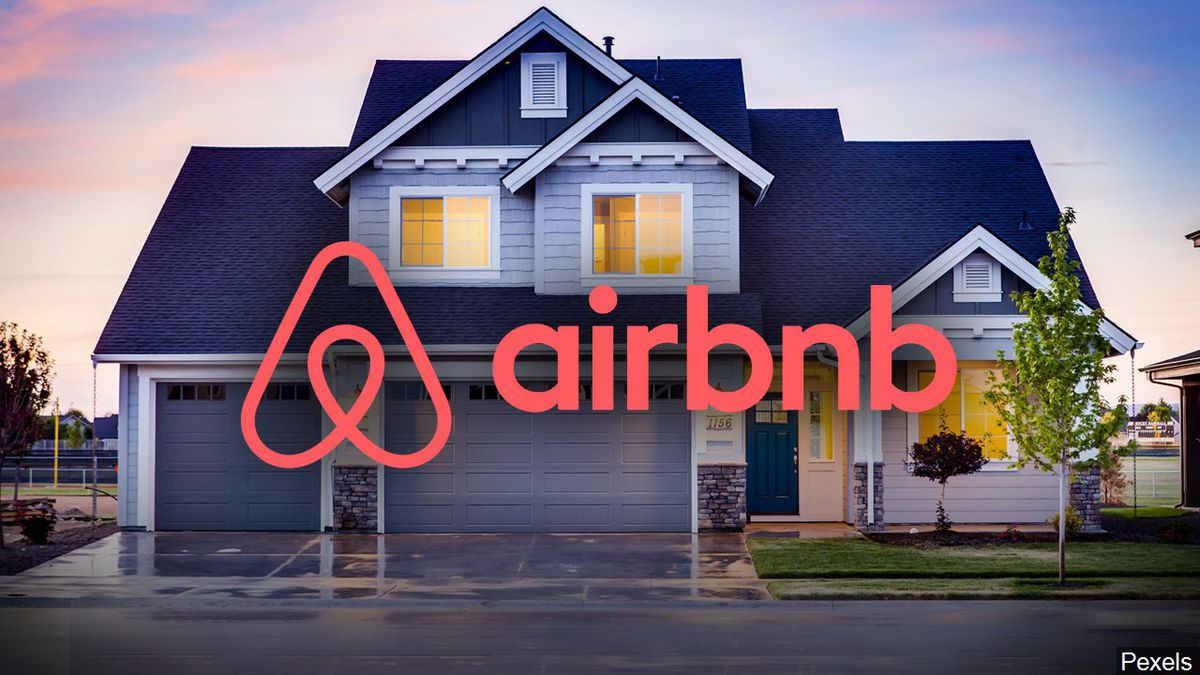
Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, New York City, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. In general, Airbnb is cheaper than hotels because Airbnb does not have to pay for the overhead costs of a hotel or the general management of such a large operation.

# **3. Steps performed in this EDA Project**
---

Handling this dataset with the fundamental steps to unvail the factors :

* Imports Libraries, Dataset and Other modules.
* Understanding Our Dataset.
* Analysing Data : Reading & Inspection of Data.
    *   Data Structure (Head, Tail, Shape)
    *   Data information (Basic Schema)
    *   Arithmatic measurement (Statistical Values)
* Data Preparation & Processing.
    *   Cleaning Null Values
    *   Removing Rows Having Zero Price Value
    *   Handling Outliers 
    *   Finding relation and dependency in Data
* Exploratory Analysis
    *   Categorical Data Visualisation
    *   Visualization using differen plots in relation with milestone questions
    *   Other important Visualisation
* Key Findings and Conclusion

# <b>4. Importing Required Libraries And Loading Our Airbnb Dataset
---

**Importing Essential Liabraries**


In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster

**Mounting My Drive**

In [2]:
#Mounting My Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading My Dataset**

In [3]:
#Loading My Dataset.
path = ("/content/drive/MyDrive/Copy of Airbnb NYC 2019 (1).csv")
df = pd.read_csv(path)

# <b> 5. Understanding The Dataset</b>
---

As the objective is clear the data needs to be analysed and this process starts with understanding our dataset of Airbnb NYC(New York City) and we come to understand the following things:

Our dataset contain 16 variables as follows:

1. **id**- refers to the identity number of the property listed by a particular host.

2. **name**- refers to name of the listed property in Airbnb.

3. **host_id**- refers to the identity number of the host who registered on AirBnb website.

4. **host_name**- refers to name of the hosts, who listed their properties.

5. **room_type**- represents the various types of room in the listed property. 
  * Entire home/apt
  * Private room
  * Shared room

6. **price**- refers to the cost of the room per night in USD.

7. **minimum_nights**- refers to the minimum number of nights stayed by the customer.

8. **number_of_reviews**- refers to the number of customers reviewed the property.

9. **last_review**- refers to the date when the listed property was last reviewed.

10. **availability_365**- refers to the availability of the listed property out of the total 365 days of a year.

11. **reviews_per month**- refers o the count of reviews per month the property received.

12. **longitude**- these represents the longitude coordinates of the property listed.

13. **latitude**- these represents the latitude coordinates of the property listed.

14. **neighbourhood_group**- refers to the names of the neighbourhood groups present in the NYC.
  * Manhattan
  * Brooklyn
  * Queens
  * Bronx
  * Staten Island

15. **Neighbourhood**- refers to the names of the neighbourhood present in NYC.

16. **calculated_host_listings_count**- refers to the number of properties listed under a particular host.

# <b> 6. Exploring Our Airbnb NYC Dataset </b>
---


**Lets dive into the our dataset, we will see top rows, bottom rows, shape, size and other arithmatical representations of our data.**

In [4]:
#Top 10 rows of our dataset.
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [5]:
#Bottom 10 rows of our dataset.
df.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
#let's see the shape of the our dataset.
Row, Column = df.shape
print(f"Number 0f rows is {Row}")
print(f"Number 0f columns is {Column}")

Number 0f rows is 48895
Number 0f columns is 16


In [7]:
# let's look at the descriptive statistic aspects of the dataframes.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Note: Here we can see that in our dataset some columns have outliners.**

In [8]:
#lets check non null values and datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Note: Here we can see that in our dataset some columns have null values.**

In [9]:
#lets check the number of unique values in each columns. 
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

**Note: Here we can see that we have two categorical columns.**
 * neighbourhood_groups
 * room_type

# **7. Data Preparation**
---

After exploring our dataset, we can say that the dataset needs some cleaning before going to visualisation. We observed that there were some null values present in few of our columns and there were some outliers too. Other columns such as **number_of_reviews and calculated_host_listings_count** are skewed toward right.


###**Cleaning Null Values**

In [10]:
#lets check number of Null Values in our columns.
for i in df.columns:
    ab = df[i].isnull().sum()
    if ab != 0:
        print(i + " column has {} null values.".format(ab))
        print()

name column has 16 null values.

host_name column has 21 null values.

last_review column has 10052 null values.

reviews_per_month column has 10052 null values.



In [11]:
# Let's check for the percentage of Null Values in our columns.
Total = df.isnull().sum().sort_values(ascending=False)
Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([Total,Percentage], axis=1, keys=['Total','Percentage']) 
missing_value

,Total,Percentage
last_review,10052,20.558339
reviews_per_month,10052,20.558339
host_name,21,0.042949
name,16,0.032723
id,0,0.000000
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


As we can see there are some Null Values in **host_name**, **name** , **last_review** and **reviews_per_month** 

<u/>**last_review**</u> : last_review column has more than 20% of the null values and this is quite irrelevant column for our analysis so we can simply drop this column.

<u/>**host_name** & **name**</u> : Missing values are 21 & 16 in host_name and name columns respectively and both are less than 0.5% so we will simply drop the rows corresponding to the missing values as they are very less in numbers and that won't affect our visualisation.

<u/>**reviews_per_month**</u> : We found some null values in reviews_per_month column and from analysis point of view it is an important column, so we will replace all the Null values of review_per_month column with zero ('0').

In [12]:
#Dropping null values column
df.drop(['last_review'], axis=1,inplace=True)

In [13]:
#Dropping null values rows
df.dropna(subset=['name', 'host_name'], axis=0,inplace=True)

In [14]:
#Making function for imputing zero in place of null values
def impute_zero(series):
    return series.fillna(0)

df.reviews_per_month=df["reviews_per_month"].transform(impute_zero)

In [15]:
#Better To Double Check
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

###**Removing Rows Having Zero Price Value**

In [16]:
#Checking the number of rows with zero price values in our dataset.
df[df.price==0].shape

(11, 15)

**Here we can clearly see that these eleven entries need to be drop in order to get meaningful analysis so we will be dropping these entries where price equals to zero ("0").**

In [17]:
#Removing rows having zero price values from our dataset.
df = df[df['price'] !=0]

In [18]:
#Shape of our dataset after treatment of null values and eliminatimg prices having zero values.
Row , Column = df.shape
print(f"Number 0f rows is {Row}")
print(f"Number 0f columns is {Column}")

Number 0f rows is 48847
Number 0f columns is 15


## **Handling Outliers**

In [19]:
# let's look at the statistical aspects of the dataframes for determining outliners.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.884700e+04,4.884700e+04,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000,48847.000000
mean,1.902300e+07,6.763372e+07,40.728945,-73.952176,152.774705,7.012365,23.270621,1.091014,7.149016,112.799599
std,1.098410e+07,7.862959e+07,0.054529,0.046161,240.248498,20.021362,44.550647,1.597200,32.968270,131.615947
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475094e+06,7.814734e+06,40.690090,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.968202e+07,3.079133e+07,40.723080,-73.955690,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915833e+07,1.074344e+08,40.763110,-73.936295,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


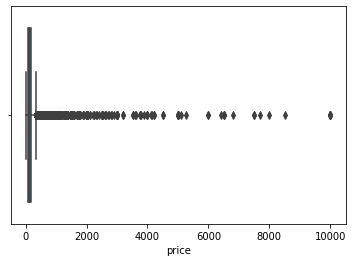

In [20]:
#Checking outliners in price column.
sns.boxplot(x=df['price'])

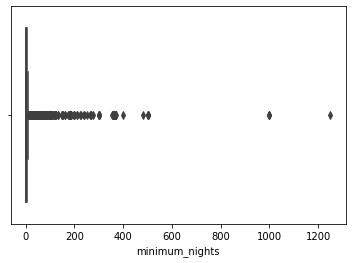

In [21]:
#Checking outliners in minimum night column.
sns.boxplot(x=df['minimum_nights'])

**Two column price & minimum_nights are having Outliners confirmed using Boxplot chart.**

**We use z-score method to handle our outliners, in this method we add two more column for z-score “z_price, z_min_nights” then we filter our data set by putting conditions that only entries having z-score less than 3 will be considered.**


In [22]:
df['z_price'] = np.abs(stats.zscore(df['price']))
df['z_min_nights'] = np.abs(stats.zscore(df['minimum_nights']))

In [23]:
# remove z scroe that are greater than 3

df = df[(df['z_price'] < 3)]
df = df[(df['z_min_nights'] < 3)]

In [24]:
# Droping 'z_price' and 'z_min_nights' columns
df.drop(['z_price','z_min_nights'],axis=1,inplace=True)

In [25]:
#lets double check our dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48149 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48149 non-null  int64  
 1   name                            48149 non-null  object 
 2   host_id                         48149 non-null  int64  
 3   host_name                       48149 non-null  object 
 4   neighbourhood_group             48149 non-null  object 
 5   neighbourhood                   48149 non-null  object 
 6   latitude                        48149 non-null  float64
 7   longitude                       48149 non-null  float64
 8   room_type                       48149 non-null  object 
 9   price                           48149 non-null  int64  
 10  minimum_nights                  48149 non-null  int64  
 11  number_of_reviews               48149 non-null  int64  
 12  reviews_per_month               

## **Finding Relation and Dependency In Data**

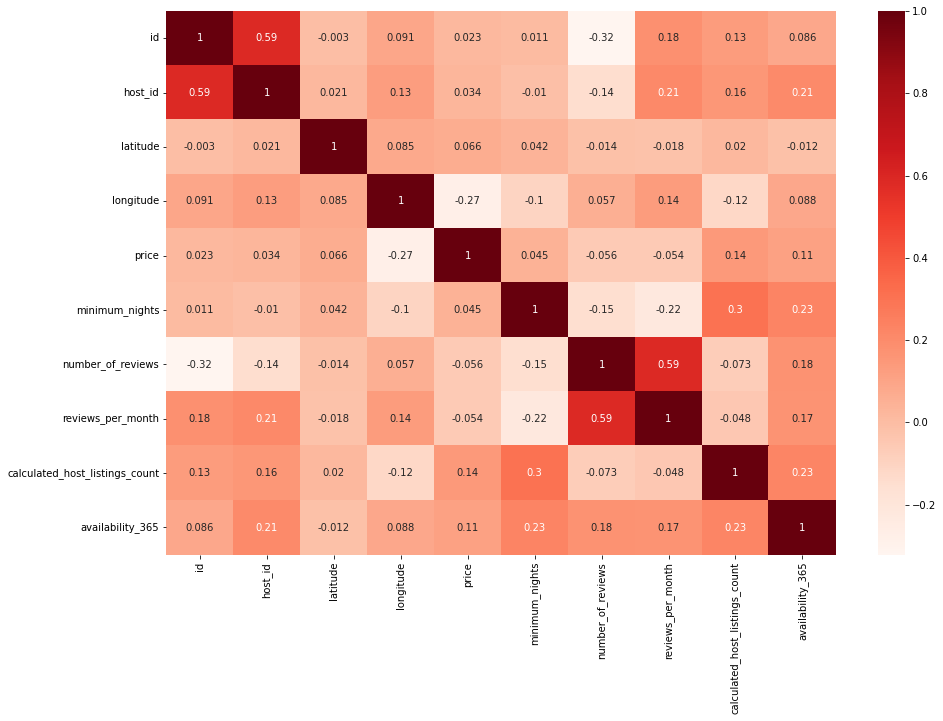

In [26]:
#let's analysize if there is any numerical corelation.

plt.figure(figsize=(15,10))
abnb_corr = df.corr()
heatmap=sns.heatmap(abnb_corr ,cbar=True,annot=True, cmap="Reds")

**Here we did not found any pleasing correlation between the numerical variables except number of reviews and reviews per month, which is not so revelant.**

# **8. Data Visualization**

---

## **Categorical Data Visualisation**

*Basically we have two categorical columns in our Airbnb dataset and on the basis which, we are going to do the further visualisataion. So lets start visualisation with those data.*

**1.   Neighbourhood Group**

**2.   Room Type** 



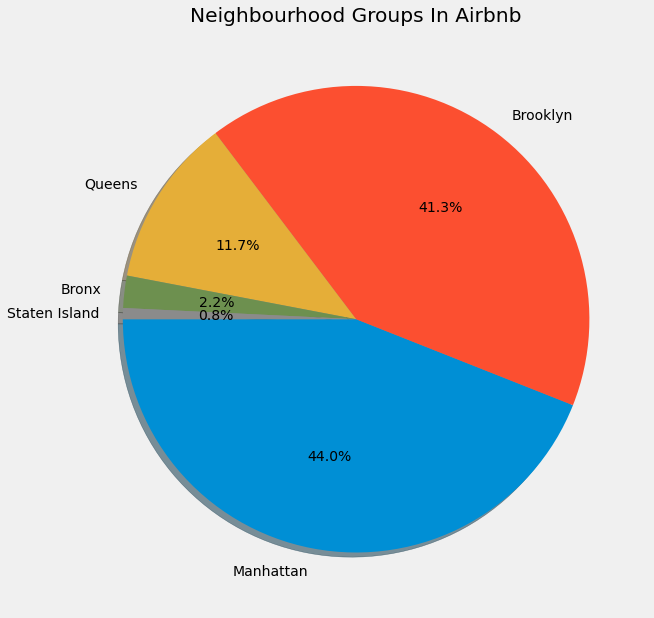

In [27]:
# Neighbourhood Groups in Airbnb

plt.style.use('fivethirtyeight')
explode = [0.03,0.03,0.03,0.03,0.03]
plt.figure(figsize=(12,10))
plt.title("Neighbourhood Groups In Airbnb")
g = plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180, shadow = True)
plt.show()

**Here Manhattan has highest number of booking followed by Brookln and they together holds more than 85% of the total booking while Staten Island holds the least percentage of booking in the neighbourhood group.**

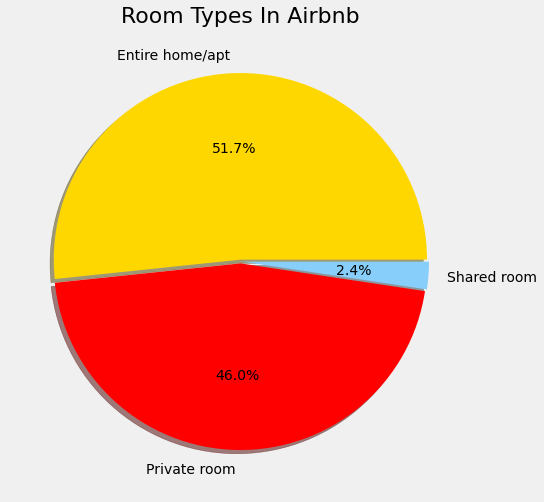

In [28]:
# Room Types In Airbnb

labels = df.room_type.value_counts().index
colors = ['gold','red','lightskyblue']
explode = [0.01,0.01,0.01]
sizes = df.room_type.value_counts().values
plt.figure(0,figsize = (10,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow = True)
plt.title('Room Types In Airbnb',color = 'black',fontsize = 22)
plt.show()

**Here Entire home/apt holds the highest number of booking followed by Private room and they together holds around 97% of the total booking while Shared room holds the least percentage of booking.**

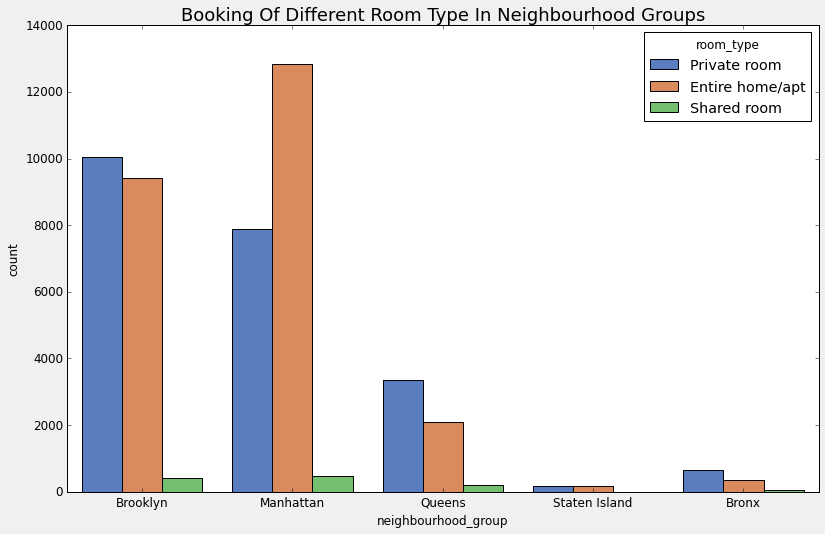

In [29]:
plt.figure(figsize=(12,8))
plt.style.use('classic')
plt.title("Booking Of Different Room Type In Neighbourhood Groups",color = 'black',fontsize = 18)
sns.countplot(df.neighbourhood_group,hue=df.room_type, palette="muted")
plt.show()

**Conclusion:**

**- In almost all neighbourhood groups, private room has been more preferred followed by Entire Home/apt.**

**- Except in Manhattan, where Entire Home/Apt is more preffered than Private rooms.**

 ## **What can we learn about different hosts and areas?**

### **Hosts And Locations**

---

In [30]:
#Visualisation of host's location on map.

Long=-73.935242
Lat=40.730610
locations = list(zip(df.latitude, df.longitude))
map1 = folium.Map(location=[Lat,Long], zoom_start=10.2)
FastMarkerCluster(data=locations).add_to(map1)
map1

**As we know our dataset is of New York City, so it is obvious that the maximum host listing will be from New York City**. 

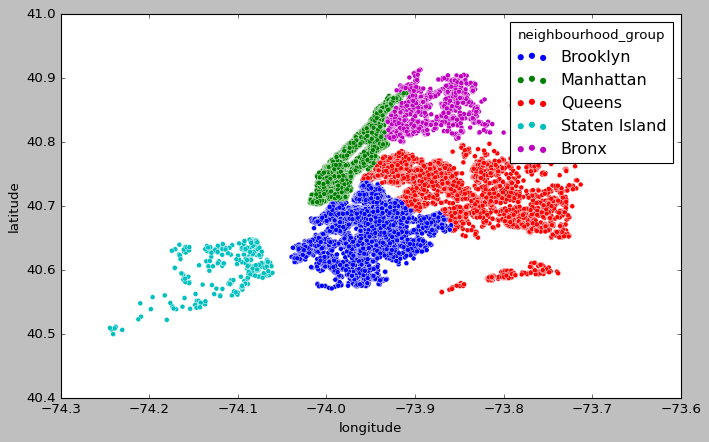

In [31]:
#Understanding the hosts and neighbourhood group's location.

plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

**Conclusion :**

**From above visualisations we can conclude that Manhattan is the most densely populated neighbourhood group by hosts and reason for it can be the presence of Manhattan Island, bounded by the Hudson, East and Harlem rivers, and many other tourist places and therefore it has highest number of host within lesser area space than any other neighbourhood group.**


## **What can we learn from predictions? (ex: locations, prices, reviews, etc)**
---

### **Price**

<Figure size 800x480 with 0 Axes>

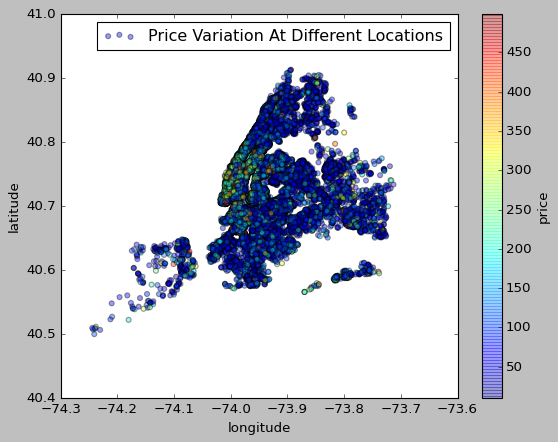

In [32]:
#Understanding the Price distribution for Different Cordinates.

plt.style.use('classic')
plt.figure(figsize=(10,6))
ax=df[df.price<500].plot(kind='scatter', x='longitude',y='latitude',label='Price Variation At Different Locations',c='price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4)
ax.legend()
plt.ioff()
plt.show()

**Here we can see that area around Manhattan has higher prices and the reason for it can be the presence of Manhattan Island, bounded by the Hudson, East and Harlem rivers, and other tourist places as we have seen in the previous graphs.**

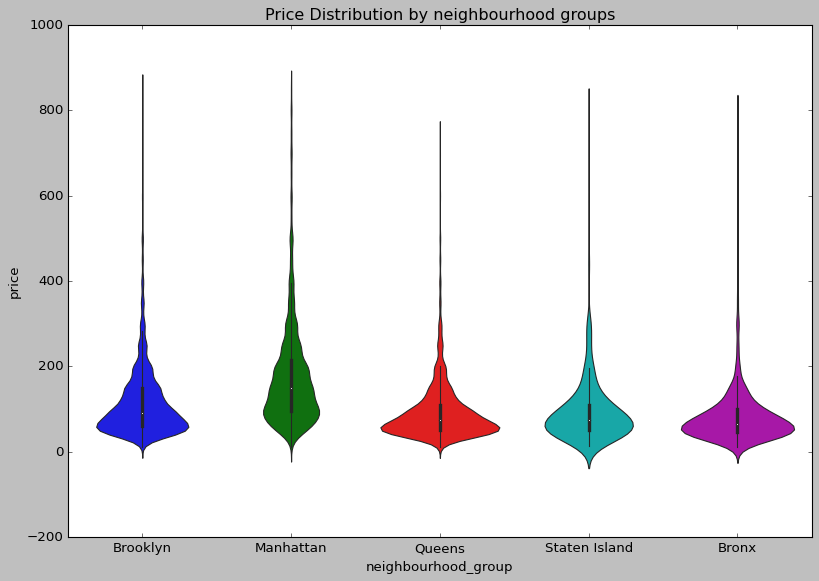

In [33]:
# Understanding the Price Distribution of different Neighbourhood Group using a very beautiful Violin Plot.
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="neighbourhood_group", y="price", data=df).set_title('Price Distribution by neighbourhood groups')
plt.show()

**We can see that Manhattan has a higher price range with evenly distributed price range compare to others and reason why it is the most expensive one. Brooklyn has the second-highest rental prices, while the Bronx appears as the most affordable one.**

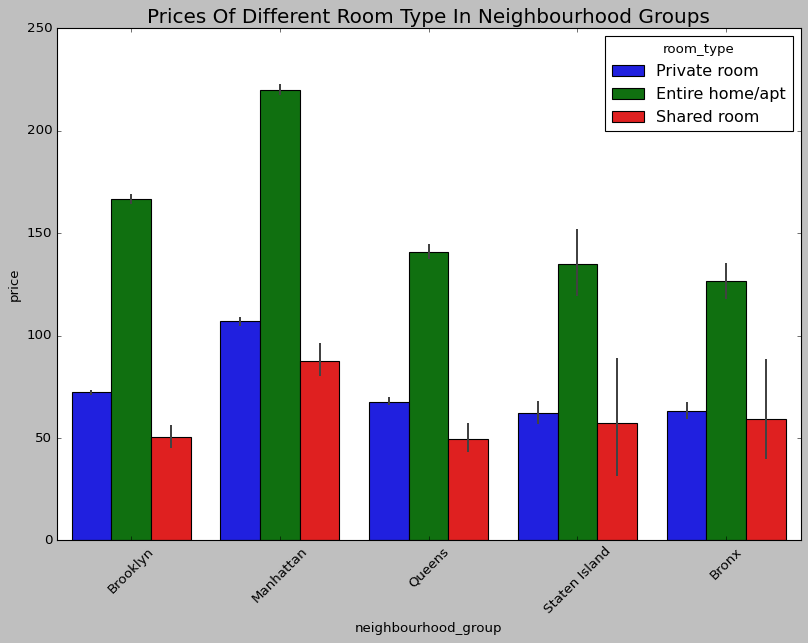

In [34]:
# Prices Of Different Room Type In Neighbourhood Groups

plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Prices Of Different Room Type In Neighbourhood Groups",color = 'black',fontsize = 18)
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = df)
plt.xticks(rotation=45)
plt.show()


**- As expected price of the Entire Home/Apt is Very High in all Neighborhood Group followed by Private Room.**

**- Also, the price in Manhattan is reletively high for all room types followed by Brooklyn and almost similar for Queens Staten Island Bronx.**

**- we can think of as Demand for Entire Home/Apt is higher specially in Manhattan and Brooklyn thus push the price at higher side.**

### **Reviews**

  neighbourhood_group  number_of_reviews
1            Brooklyn             483458
2           Manhattan             450475
3              Queens             156596
0               Bronx              28227
4       Staten Island              11541


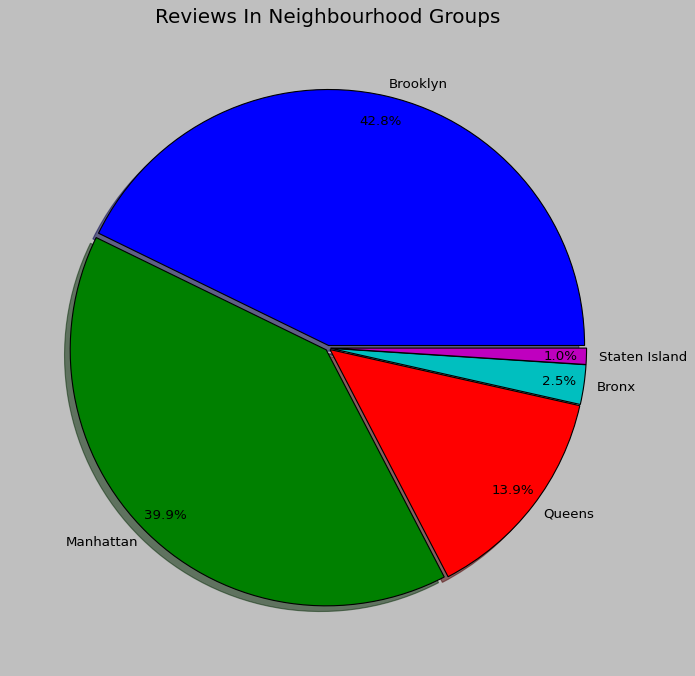

In [35]:
# Checking neighbourhood group which has More number of reviews. 
areas_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].agg('sum').reset_index().sort_values('number_of_reviews', ascending = False)
print(areas_reviews)

# Lets Visualise the number of reviews in each neighbourhood group using pie chart.
plt.rcParams['figure.figsize'] = (15,10)
reviews = areas_reviews['number_of_reviews']
plt.pie(reviews, labels = areas_reviews['neighbourhood_group'], autopct ='%0.1f%%', startangle =0,pctdistance=.9,labeldistance=1.05, explode = [0.01,0.01,0.01,0.01,0.01], shadow = True )
plt.title('Reviews In Neighbourhood Groups', {'fontsize': 18})
plt.show()

**Here Brooklyn got the maximum percentage of reviews followed by Manhattan despite of Manhattan having the highest number of booking and they together holds the 82% of the reviews. While Staten Island has the least percentage of total reviews.**

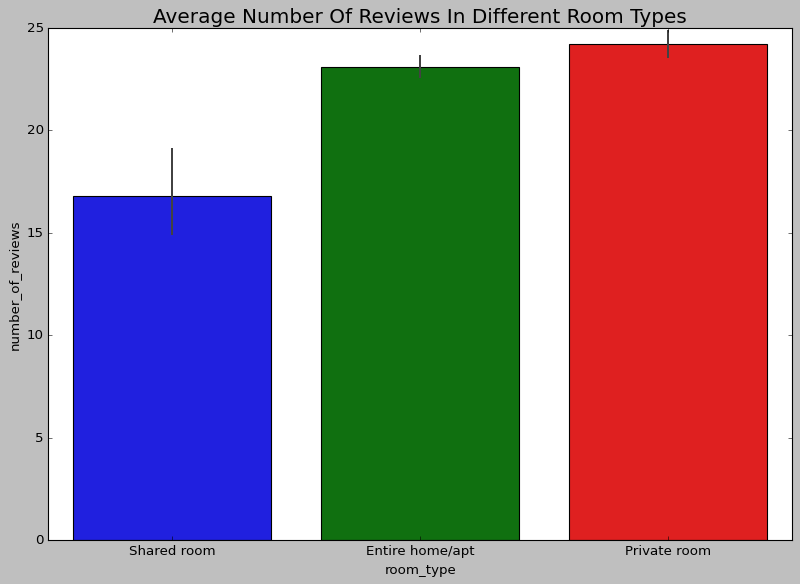

In [36]:
 # Average Number Of Reviews In Different Room Types.

plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Average Number Of Reviews In Different Room Types",color = 'black',fontsize = 18)
result = df.groupby(["room_type"])['number_of_reviews'].agg('mean').reset_index().sort_values('number_of_reviews')
sns.barplot(x='room_type', y="number_of_reviews", data=df, order=result['room_type'])
plt.show()

**Here Private room got the maximum number of reviews followed by Entire home/apt despite of Entire home/apt having the highest number of booking. While  Shared room has the least percentage of total reviews.**

### **Availability**

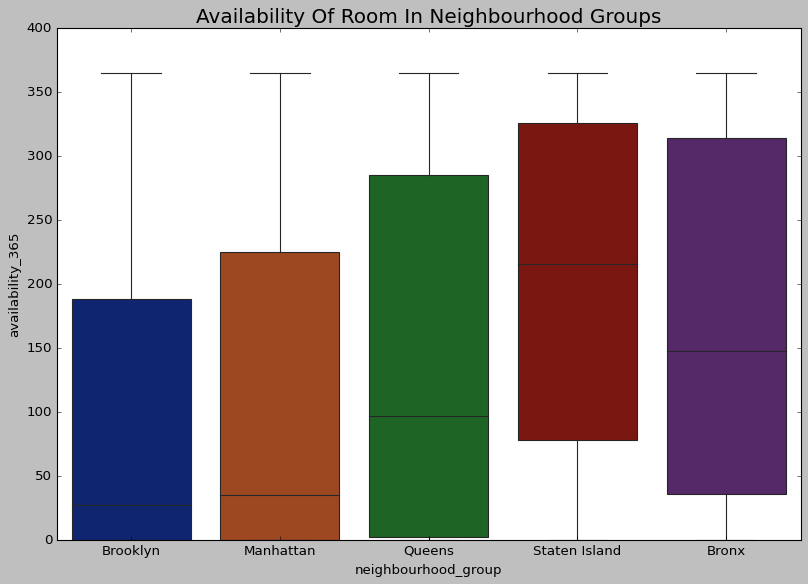

In [37]:
# Availability Of Room In Neighbourhood Groups.

plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Availability Of Room In Neighbourhood Groups",color = 'black',fontsize = 18)
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

**We have already seen that Brooklyn and Manhattan have higher number of booking compare to the others neighbourhood groups therefore they both have less availibility of rooms. Similarly Staten Island and Bronx has least number of booking therefore they have more availability of rooms compare to others.**

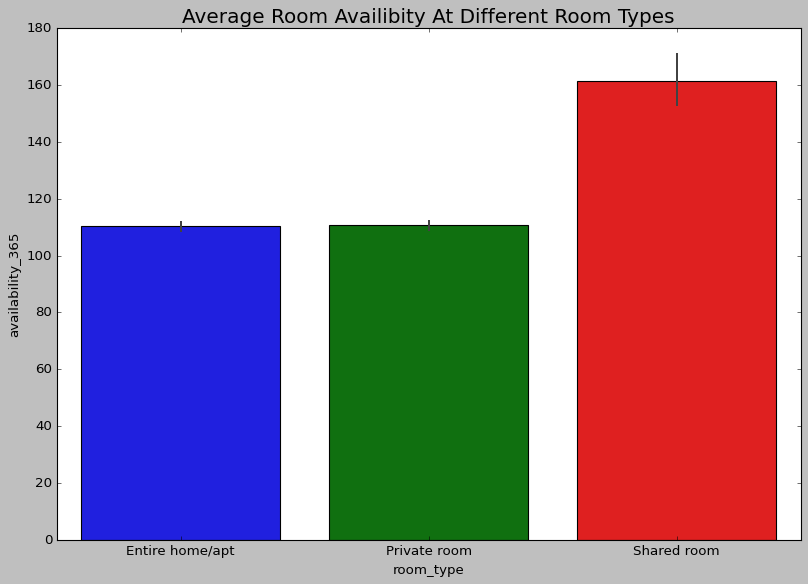

In [38]:
# Average Room Availibity At Different Room Types

plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Average Room Availibity At Different Room Types",color = 'black',fontsize = 18)
result = df.groupby(["room_type"])['availability_365'].agg('mean').reset_index().sort_values('availability_365')
sns.barplot(x='room_type', y="availability_365", data=df, order=result['room_type'])
plt.show()

**Same thing happened in room type too, like Entire home/apt and Private room have highest number of booking therefore they have lesser room availability. Similarly Shared room had least number of booking therefore they have more availability of rooms compare to others.**

### **Host Listing**

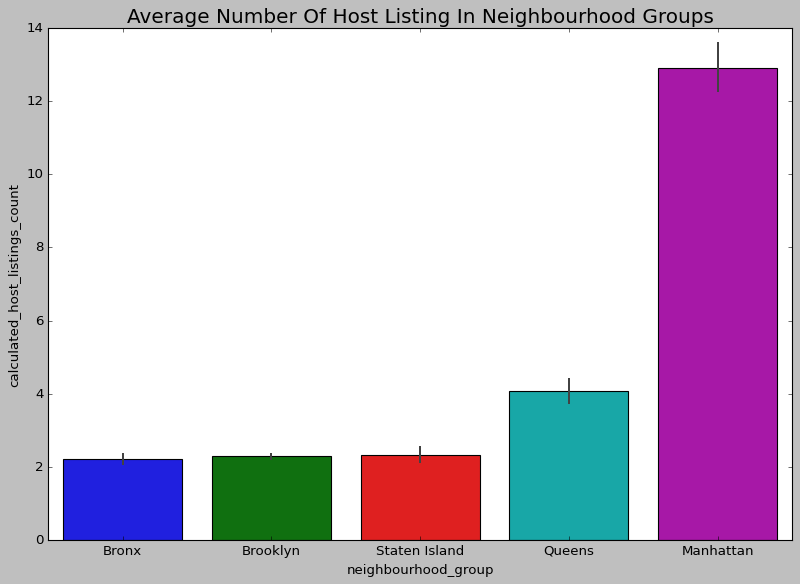

In [39]:
# Average Number Of Host Listing In Neighbourhood Groups

plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Average Number Of Host Listing In Neighbourhood Groups",color = 'black',fontsize = 18)
result = df.groupby(["neighbourhood_group"])['calculated_host_listings_count'].agg('mean').reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x='neighbourhood_group', y="calculated_host_listings_count", data=df, order=result['neighbourhood_group'])
plt.show()

**Here we can conclude that hosts of Manhattan neighborhood group have high number of properties listing in Airbnb and this could be beacause Manhattan has higher demand as well as higher price compared to any other neighbourhood groups location which encourage hosts to list more of his properties.**

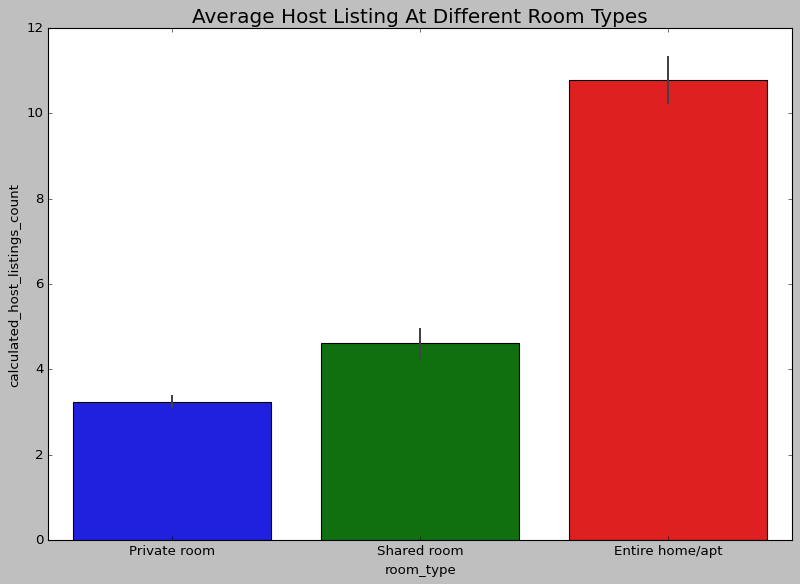

In [40]:
# Average Host Listing At Different Room Types

plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Average Host Listing At Different Room Types",color = 'black',fontsize = 18)
result = df.groupby(["room_type"])['calculated_host_listings_count'].agg('mean').reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x='room_type', y="calculated_host_listings_count", data=df, order=result['room_type'])
plt.show()

**Similarly we can say that hosts have listed Entire home/apt more than any other room type in Airbnb, and this could be because Entire home/apt has higher demand as well as higher price compare to other room types.**

### **Minimum Night Stayed**

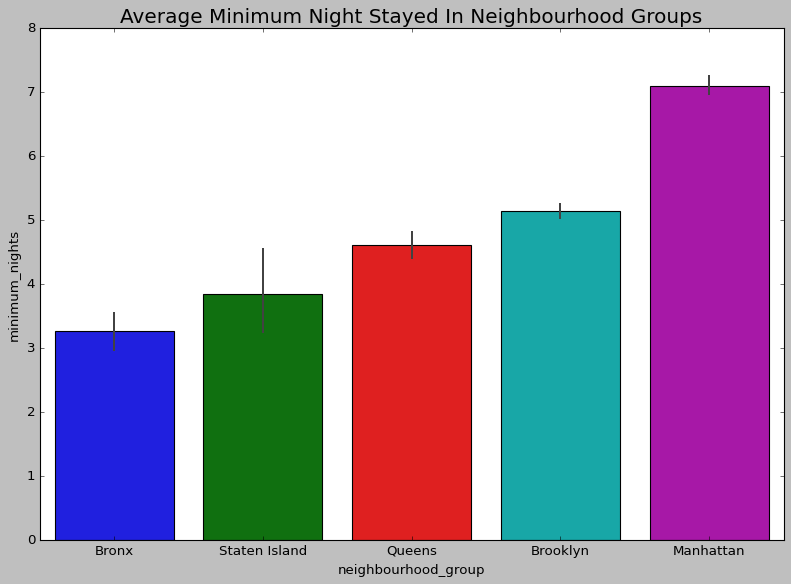

In [41]:
# Minimum Night Stayed In Neighbourhood Groups

plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Average Minimum Night Stayed In Neighbourhood Groups",color = 'black',fontsize = 18)
result = df.groupby(["neighbourhood_group"])['minimum_nights'].agg('mean').reset_index().sort_values('minimum_nights')
sns.barplot(x='neighbourhood_group', y="minimum_nights", data=df, order=result['neighbourhood_group']) 
plt.show()

**Here we can say that Manhattan has higher 'average minimum night stay' because Mahanttan has more Entire home/apt type room where people tends to stay for longer period and Bronx has least minimum night stay average.**

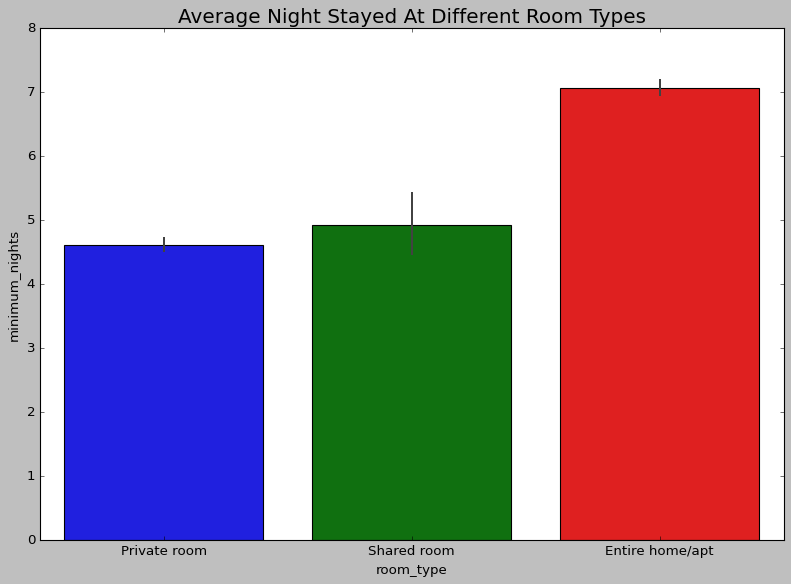

In [42]:
# Average Night Stayed At Different Room Types

plt.style.use('classic')
plt.figure(figsize=(12,8))
plt.title("Average Night Stayed At Different Room Types",color = 'black',fontsize = 18)
result = df.groupby(["room_type"])['minimum_nights'].agg('mean').reset_index().sort_values('minimum_nights')
sns.barplot(x='room_type', y="minimum_nights", data=df, order=result['room_type']) 
plt.show()

**Here we can see that Entire home/apt has higher average night stay and reason for it, we can assume is that mostly Entire home/apt are booked for family vacation, group tours or events so they tends to stay longer. While Private room and Shared room are most likely to be booked for offical purposes or for limited time stay.**

## **Which hosts are the busiest and why?**

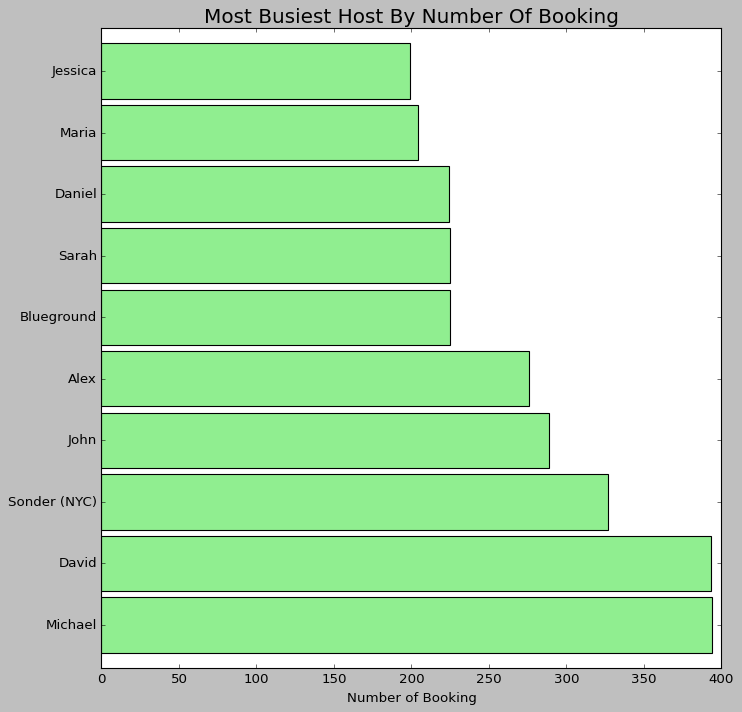

In [43]:
#Visualising The Busiest Hosts In Airbnb By Total Number Of Booking In The Host.

feq=df['host_name'].value_counts().sort_values(ascending=False)
feq[:10].plot.barh(figsize=(10, 10), color= "lightgreen", width=0.9)
plt.title("Most Busiest Host By Number Of Booking", fontsize=18)
plt.xlabel('Number of Booking', fontsize=12)
plt.show()

Considering the parameter to measure the Busiest Host as **Total Number Of Booking In The Host** by the customers, we see Top 3 Hosts as follows:

- Michael
- David
- Sonder(NYC)

**Here we can see that 'Michael' is the most busiest host and the reason for these hosts to be the busiest among all are, they belongs from the Manhattan neighbourhood group and they have Entire home/apt room type where demand are at peak with higher price due to its location.**

In [44]:
# Lets Find of Busiest Host by Total Night Stay of all customer.
busiest_hosts_by_total_night_stay = df.groupby(['host_name','host_id','room_type','neighbourhood_group'])['minimum_nights'].aggregate(np.sum).reset_index().sort_values('minimum_nights')
busiest_hosts_by_total_night_stay = busiest_hosts_by_total_night_stay.sort_values(by='minimum_nights', ascending=False).head(10)
busiest_hosts_by_total_night_stay

,host_name,host_id,room_type,neighbourhood_group,minimum_nights
4997,Blueground,107434423,Entire home/apt,Manhattan,6720
34143,Sonder (NYC),219517861,Entire home/apt,Manhattan,4337
19505,Kara,30283594,Entire home/apt,Manhattan,3537
17004,Jeremy & Laura,16098958,Entire home/apt,Manhattan,2850
34142,Sonder,12243051,Entire home/apt,Manhattan,2784
8033,Corporate Housing,61391963,Entire home/apt,Manhattan,2760
20321,Ken,22541573,Entire home/apt,Manhattan,2580
20156,Kazuya,137358866,Private room,Queens,2370
29963,Pranjal,200380610,Entire home/apt,Manhattan,1920
37055,Vida,7503643,Entire home/apt,Brooklyn,1560


<BarContainer object of 10 artists>

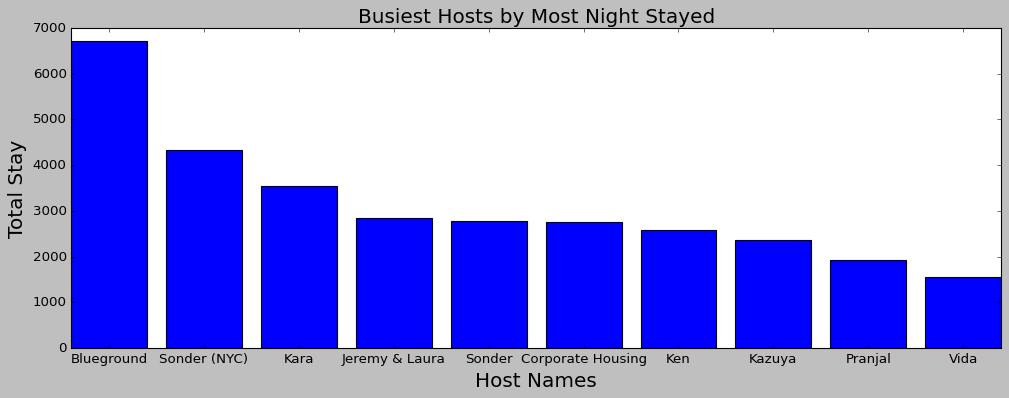

In [45]:
# Visualising The Busiest Hosts In Airbnb By Total Number Of Night stayed In The Host.

host_name = busiest_hosts_by_total_night_stay['host_name']
stay = busiest_hosts_by_total_night_stay['minimum_nights']
plt.rcParams['figure.figsize'] = (15,5)
plt.title('Busiest Hosts by Most Night Stayed', {'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Total Stay',{'fontsize':18})
plt.bar(host_name, stay)

Considering the parameter to measure the Busiest Host as **Total Number of Night Stay In the Host Listing** by the customers, we see Top 5 Hosts as follows:

- Blueground
- Sonder (NYC)
- Kara
- Jeremy & Laura
- Sonder

**Similarly here we can see that 'Blueground' is the most busiest host and the reason for these hosts to be the busiest among all are, they belongs from the Manhattan neighbourhood group and they have Entire home/apt room type where demand are at peak with higher price due to its location..**

##**Other Important Visualisations**

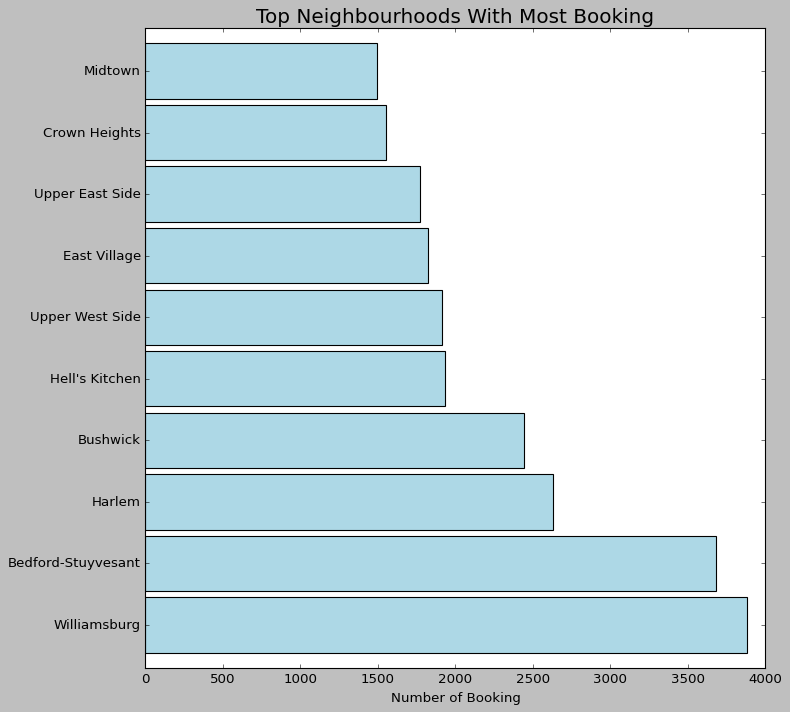

In [46]:
# Lets See who are the Top Neighbourhood Having Maximum Booking.

feq=df['neighbourhood'].value_counts().sort_values(ascending=False)
feq[:10].plot.barh(figsize=(10, 10), width=0.9, color = 'lightblue')
plt.title("Top Neighbourhoods With Most Booking", fontsize=18)
plt.xlabel('Number of Booking', fontsize=12)
plt.show()

Here we can see the neighbourhoods with maximum number of booking 
Considering the parameter to measure Busiest Neighbourhood as **Total Number of Booking by Customer** in the each neighbourhoods, we see Top 5 Hosts as follows:

- Williamsburg
- Bedford-Stuyvesant
- Harlem
- Bushwick
- Hell's Kitchen

In [47]:
# Let's see Top 10 Hosts which has the most listings with their neighbourhood.
host_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_areas.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(10)
top_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13082,Sonder (NYC),Manhattan,327
1806,Blueground,Brooklyn,232
1807,Blueground,Manhattan,232
7205,Kara,Manhattan,121
7407,Kazuya,Manhattan,103
7408,Kazuya,Queens,103
7406,Kazuya,Brooklyn,103
6477,Jeremy & Laura,Manhattan,96
13081,Sonder,Manhattan,96
2866,Corporate Housing,Manhattan,91


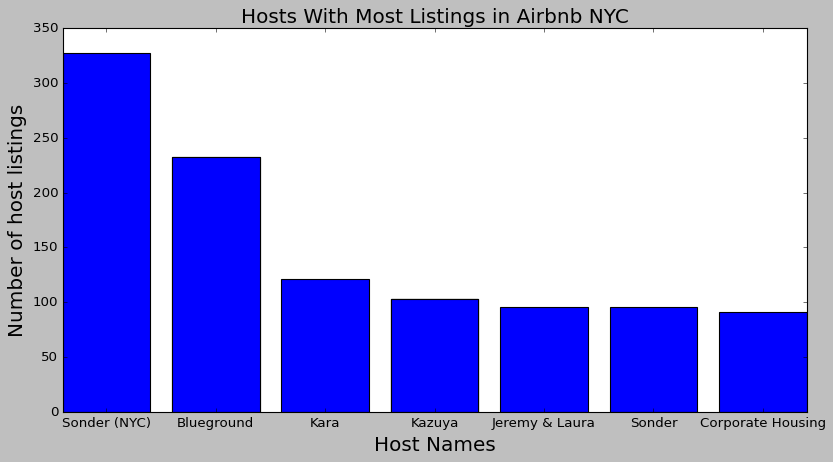

In [48]:
# Let's See The Top Hosts With Most Number Of Listings.

plt.rcParams['figure.figsize'] = (12,6)
host_name = top_hosts['host_name']
host_lisitng = top_hosts['calculated_host_listings_count']
plt.bar(host_name,host_lisitng)
plt.title('Hosts With Most Listings in Airbnb NYC',{'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of host listings',{'fontsize':18})
plt.show()

**Sonder(NYC) from Manhattan has the highest Number of Listing in Airbnb NYC.** 

Also seven Out of ten are from Single neighbourhood Group so we can say that Manhatten seems to be highest contributor in neighbourhood group.

## **Is there any noticeable difference of traffic among different areas and what could be the reason for it?**


**Yes.. we have already seen that area around New York City especially in Manhattan, hosts has maximum number of booking with most high prices, the reason for it can be the presence of Manhattan Island, bounded by the Hudson, East and Harlem rivers, and other tourist places and therefore Manhatten is also the most densely populated area by the hosts, with lesser area space than any other neighbourhood group.**

#**8. Key Findings And Conclusions**

---

**Key Findings:** 
1.	Manhattan and Brooklyn neighborhood groups hold around 85% of the total booking while Staten Island has the least number of bookings.
2.	Manhattan neighborhood hosts have higher number of properties listed in Airbnb.
3.	Entire home/apt is the most preferred room type followed by private room and they hold around 97% of the total booking.
4.	Queens has significantly less host listings than Manhattan. So, we should take enough steps to encourage host listings in Queens.
5.   Seven out of ten top neighborhood belongs from Manhattan neighborhood group with Entire home/apartment room type.




**Conclusions:**

❖	We can conclude from the analysis that Manhattan is the top neighborhood group with the highest number of bookings and host listings. Seven out of ten top hosts are from Manhattan. One of the probable reasons for being the most preferred Neighborhood Group is that Manhattan is world-famous for its museums, stores, parks, music and cultures. It has high number of tourist places where Entire Home/Apartment are more preferred as stay options and for longer periods. These factors increased the demand and led to higher prices compared to any other neighborhood groups.

❖	Brooklyn has significant number of bookings because Brooklyn also has some famous bridges, parks, museums, islands and other tourist places but with more affordable prices as compared to Manhattan. It also received the maximum number of reviews followed by Manhattan. 

❖	Rest 3 neighborhood groups namely Queens, Bronx and Staten Island are observing very less number of bookings and hosts, especially on Staten Island. Considering that these are less popular areas, it is possible that some guests choose these locations to save up money or for official purposes who want to stay for limited time periods. And these neighborhood groups have higher room availability than Brooklyn and Manhattan.

